<a href="https://colab.research.google.com/github/trisha-shiny/stock-price-prediction/blob/main/6_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow scikit-learn matplotlib pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
df = pd.read_csv("TSLA.csv")
print(df.head())

         Date Close/Last    Volume     Open     High        Low
0  09/13/2024    $230.29  59515110  $228.00  $232.67    $226.32
1  09/12/2024    $229.81  72020040  $224.66  $231.45    $223.83
2  09/11/2024    $228.13  83548630  $224.55  $228.47  $216.8003
3  09/10/2024    $226.17  78891140  $220.07  $226.40  $218.6377
4  09/09/2024    $216.27  67443520  $216.20  $219.87    $213.67


In [7]:
data = df['Close/Last'].str.replace('$', '', regex=False).astype(float).values.reshape(-1,1)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [9]:
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size-60:]

In [10]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0375
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0013
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0014
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0013
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0011
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 9.5918e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.5923e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.8793e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 7.3357e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0013


In [14]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


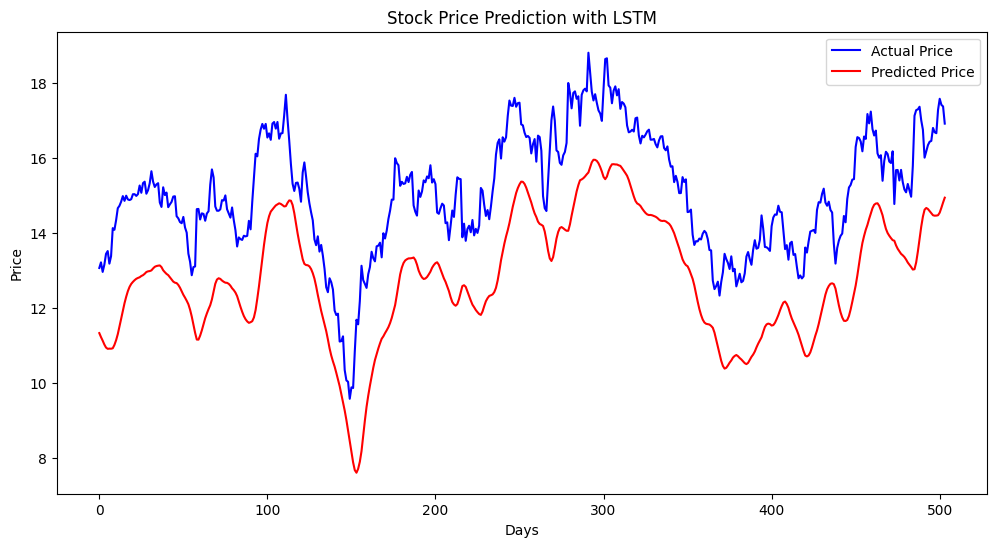

In [15]:
plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual Price", color="blue")
plt.plot(predictions, label="Predicted Price", color="red")
plt.title("Stock Price Prediction with LSTM")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()